In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from openbb import obb
obb.user.preferences.output_type="dataframe"

In [2]:
pd.DataFrame(np.random.normal(1.0, 0.03, (100, 10)))

,0,1,2,3,4,5,6,7,8,9
0,1.012735,0.964595,0.994036,1.016324,0.988231,0.957267,1.017811,1.026432,0.970081,0.979003
1,0.966261,0.991931,0.970783,1.070175,0.966638,1.014619,0.973486,0.978490,1.028164,0.992150
2,1.029938,1.004757,0.965853,1.030951,0.955559,1.044771,0.994784,1.012033,1.026179,1.011855
3,1.038150,1.000006,0.968636,0.992068,1.008178,0.972176,1.002671,1.006208,0.960715,0.978282
4,1.022328,1.037478,0.980654,0.998457,1.030851,0.962107,1.003120,1.016259,0.974942,1.008499
...,...,...,...,...,...,...,...,...,...,...
95,1.067191,0.971302,1.038672,0.989832,0.979230,0.997152,1.004354,0.983663,1.020571,0.990419
96,0.976650,1.016155,1.014354,0.994600,1.005466,1.027007,1.010174,0.998492,0.997933,0.990248
97,1.083191,0.974303,1.039330,0.970942,1.014480,0.988206,1.046362,0.987365,1.029964,0.978361
98,1.066721,0.979587,0.941947,1.005642,1.014913,0.997354,1.035081,1.018144,1.024125,0.957582


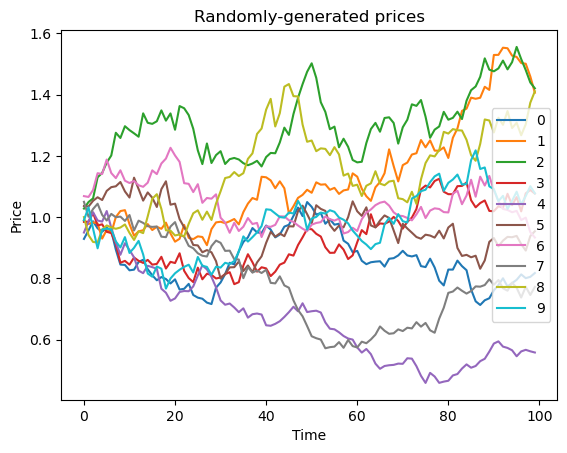

In [3]:
returns = pd.DataFrame(np.random.normal(1.0, 0.03, (100, 10)))
prices = returns.cumprod()
prices.plot()
plt.title("Randomly-generated prices")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend(loc=0)

In [4]:
s = pd.Series([1,2, np.nan, 4,5])
print(s)

0    1.0
1    2.0
2    NaN
3    4.0
4    5.0
dtype: float64


In [5]:
print(s.name)

None


In [6]:
s.name = "Toys Series"

In [7]:
print(s.name)

Toys Series


In [8]:
print(s.index)

RangeIndex(start=0, stop=5, step=1)


In [9]:
len(s)

5

In [10]:
new_index = pd.date_range("2016-01-01", periods = len(s), freq= "D")
print(new_index)

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05'],
              dtype='datetime64[ns]', freq='D')


In [11]:
rng = pd.date_range("1/1/2016", periods = 1000, freq = "s")
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts

2016-01-01 00:00:00    464
2016-01-01 00:00:01    149
2016-01-01 00:00:02    475
2016-01-01 00:00:03     44
2016-01-01 00:00:04     71
                      ... 
2016-01-01 00:16:35    223
2016-01-01 00:16:36    348
2016-01-01 00:16:37    287
2016-01-01 00:16:38     93
2016-01-01 00:16:39    490
Freq: s, Length: 1000, dtype: int64

In [12]:
rng = pd.date_range("1/1/2012", periods = 5, freq = "QE")
rng

DatetimeIndex(['2012-03-31', '2012-06-30', '2012-09-30', '2012-12-31',
               '2013-03-31'],
              dtype='datetime64[ns]', freq='QE-DEC')

In [13]:
ts = pd.Series(np.random.randint(len(rng)), index=rng)
ts

2012-03-31    0
2012-06-30    0
2012-09-30    0
2012-12-31    0
2013-03-31    0
Freq: QE-DEC, dtype: int64

In [14]:
ts.to_period()

2012Q1    0
2012Q2    0
2012Q3    0
2012Q4    0
2013Q1    0
Freq: Q-DEC, dtype: int64

In [15]:
s.index = new_index

In [16]:
print(s.index)

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05'],
              dtype='datetime64[ns]', freq='D')


In [17]:
print("First element of the series: ", s.iloc[0])
print("Last element of the series: ", s.iloc[len(s) - 1])

First element of the series:  1.0
Last element of the series:  5.0


In [18]:
s.iloc [0:2]

2016-01-01    1.0
2016-01-02    2.0
Freq: D, Name: Toys Series, dtype: float64

In [19]:
s.loc["2016-01-01"]

1.0

In [20]:
s.loc["2016-01-02":"2016-01-04"]

2016-01-02    2.0
2016-01-03    NaN
2016-01-04    4.0
Freq: D, Name: Toys Series, dtype: float64

In [21]:
s < 3.0

2016-01-01     True
2016-01-02     True
2016-01-03    False
2016-01-04    False
2016-01-05    False
Freq: D, Name: Toys Series, dtype: bool

In [22]:
s.loc[s < 3]

2016-01-01    1.0
2016-01-02    2.0
Freq: D, Name: Toys Series, dtype: float64

In [23]:
s.loc[(s < 3) & (s > 1)]

2016-01-02    2.0
Freq: D, Name: Toys Series, dtype: float64

In [24]:
symbol = "CMG"
start = "2012-01-01"
end = "2016-01-01"
prices = obb.equity.price.historical(
    symbol, 
    start_date=start, 
    end_date=end, 
    provider="yfinance"
). close

In [25]:
prices.index

Index([2012-01-03, 2012-01-04, 2012-01-05, 2012-01-06, 2012-01-09, 2012-01-10,
       2012-01-11, 2012-01-12, 2012-01-13, 2012-01-17,
       ...
       2015-12-17, 2015-12-18, 2015-12-21, 2015-12-22, 2015-12-23, 2015-12-24,
       2015-12-28, 2015-12-29, 2015-12-30, 2015-12-31],
      dtype='object', name='date', length=1006)

In [26]:
prices.index = pd.to_datetime(prices.index)

In [27]:
print("\n", type (prices))
prices.tail(5)


 <class 'pandas.core.series.Series'>


date
2015-12-24    9.9020
2015-12-28    9.8704
2015-12-29    9.7988
2015-12-30    9.7158
2015-12-31    9.5970
Name: close, dtype: float64

In [28]:
print(prices.index)

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2015-12-17', '2015-12-18', '2015-12-21', '2015-12-22',
               '2015-12-23', '2015-12-24', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', name='date', length=1006, freq=None)


In [29]:
eastern_prices = prices.tz_localize("US/Eastern")
eastern_prices.head(10)

date
2012-01-03 00:00:00-05:00    6.8254
2012-01-04 00:00:00-05:00    6.9750
2012-01-05 00:00:00-05:00    7.0096
2012-01-06 00:00:00-05:00    6.9790
2012-01-09 00:00:00-05:00    6.7948
2012-01-10 00:00:00-05:00    6.8224
2012-01-11 00:00:00-05:00    6.9520
2012-01-12 00:00:00-05:00    6.9524
2012-01-13 00:00:00-05:00    7.0924
2012-01-17 00:00:00-05:00    7.0676
Name: close, dtype: float64

In [30]:
calendar_dates = pd.date_range (start=start, end=end, freq="D", tz="US/Eastern")
print (calendar_dates)

DatetimeIndex(['2012-01-01 00:00:00-05:00', '2012-01-02 00:00:00-05:00',
               '2012-01-03 00:00:00-05:00', '2012-01-04 00:00:00-05:00',
               '2012-01-05 00:00:00-05:00', '2012-01-06 00:00:00-05:00',
               '2012-01-07 00:00:00-05:00', '2012-01-08 00:00:00-05:00',
               '2012-01-09 00:00:00-05:00', '2012-01-10 00:00:00-05:00',
               ...
               '2015-12-23 00:00:00-05:00', '2015-12-24 00:00:00-05:00',
               '2015-12-25 00:00:00-05:00', '2015-12-26 00:00:00-05:00',
               '2015-12-27 00:00:00-05:00', '2015-12-28 00:00:00-05:00',
               '2015-12-29 00:00:00-05:00', '2015-12-30 00:00:00-05:00',
               '2015-12-31 00:00:00-05:00', '2016-01-01 00:00:00-05:00'],
              dtype='datetime64[ns, US/Eastern]', length=1462, freq='D')


In [31]:
calendar_prices = eastern_prices.reindex(calendar_dates, method="bfill")
calendar_prices.head(15)

2012-01-01 00:00:00-05:00    6.8254
2012-01-02 00:00:00-05:00    6.8254
2012-01-03 00:00:00-05:00    6.8254
2012-01-04 00:00:00-05:00    6.9750
2012-01-05 00:00:00-05:00    7.0096
2012-01-06 00:00:00-05:00    6.9790
2012-01-07 00:00:00-05:00    6.7948
2012-01-08 00:00:00-05:00    6.7948
2012-01-09 00:00:00-05:00    6.7948
2012-01-10 00:00:00-05:00    6.8224
2012-01-11 00:00:00-05:00    6.9520
2012-01-12 00:00:00-05:00    6.9524
2012-01-13 00:00:00-05:00    7.0924
2012-01-14 00:00:00-05:00    7.0676
2012-01-15 00:00:00-05:00    7.0676
Freq: D, Name: close, dtype: float64

In [32]:
calendar_prices = eastern_prices.reindex (calendar_dates)
calendar_prices.head (15)

2012-01-01 00:00:00-05:00       NaN
2012-01-02 00:00:00-05:00       NaN
2012-01-03 00:00:00-05:00    6.8254
2012-01-04 00:00:00-05:00    6.9750
2012-01-05 00:00:00-05:00    7.0096
2012-01-06 00:00:00-05:00    6.9790
2012-01-07 00:00:00-05:00       NaN
2012-01-08 00:00:00-05:00       NaN
2012-01-09 00:00:00-05:00    6.7948
2012-01-10 00:00:00-05:00    6.8224
2012-01-11 00:00:00-05:00    6.9520
2012-01-12 00:00:00-05:00    6.9524
2012-01-13 00:00:00-05:00    7.0924
2012-01-14 00:00:00-05:00       NaN
2012-01-15 00:00:00-05:00       NaN
Freq: D, Name: close, dtype: float64

In [33]:
meanfilled_prices = calendar_prices.fillna(calendar_prices. mean ())
meanfilled_prices.head(10)

2012-01-01 00:00:00-05:00    10.032733
2012-01-02 00:00:00-05:00    10.032733
2012-01-03 00:00:00-05:00     6.825400
2012-01-04 00:00:00-05:00     6.975000
2012-01-05 00:00:00-05:00     7.009600
2012-01-06 00:00:00-05:00     6.979000
2012-01-07 00:00:00-05:00    10.032733
2012-01-08 00:00:00-05:00    10.032733
2012-01-09 00:00:00-05:00     6.794800
2012-01-10 00:00:00-05:00     6.822400
Freq: D, Name: close, dtype: float64

In [34]:
bfilled_prices = calendar_prices.bfill()
bfilled_prices.head(10)

2012-01-01 00:00:00-05:00    6.8254
2012-01-02 00:00:00-05:00    6.8254
2012-01-03 00:00:00-05:00    6.8254
2012-01-04 00:00:00-05:00    6.9750
2012-01-05 00:00:00-05:00    7.0096
2012-01-06 00:00:00-05:00    6.9790
2012-01-07 00:00:00-05:00    6.7948
2012-01-08 00:00:00-05:00    6.7948
2012-01-09 00:00:00-05:00    6.7948
2012-01-10 00:00:00-05:00    6.8224
Freq: D, Name: close, dtype: float64

In [35]:
dropped_prices = calendar_prices.dropna()
dropped_prices.head(10)

2012-01-03 00:00:00-05:00    6.8254
2012-01-04 00:00:00-05:00    6.9750
2012-01-05 00:00:00-05:00    7.0096
2012-01-06 00:00:00-05:00    6.9790
2012-01-09 00:00:00-05:00    6.7948
2012-01-10 00:00:00-05:00    6.8224
2012-01-11 00:00:00-05:00    6.9520
2012-01-12 00:00:00-05:00    6.9524
2012-01-13 00:00:00-05:00    7.0924
2012-01-17 00:00:00-05:00    7.0676
Name: close, dtype: float64

Text(0.5, 0, 'Date')

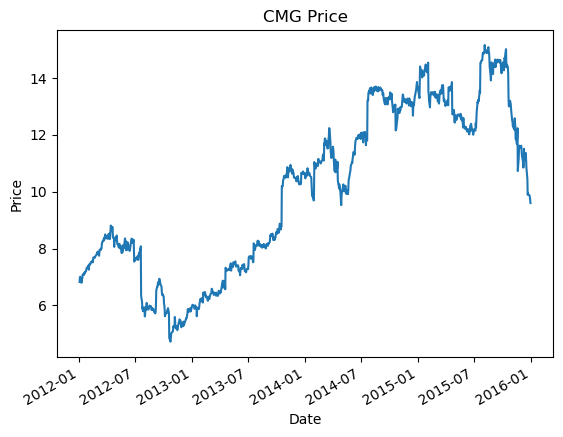

In [36]:
prices.plot ()
plt.title(symbol + " Price")
plt.ylabel("Price") 
plt.xlabel("Date")

In [37]:
print ("Mean: ", prices. mean ())
print("Standard deviation: ", prices.std())

Mean:  10.032733014753278
Standard deviation:  2.933774744140719


In [38]:
prices.pct_change().describe()

count    1005.000000
mean        0.000540
std         0.019868
min        -0.215124
25%        -0.007254
50%         0.000236
75%         0.008278
max         0.160954
Name: close, dtype: float64

In [39]:
print ("Summary Statistics")
print (prices.describe ())

Summary Statistics
count    1006.000000
mean       10.032733
std         2.933775
min         4.724800
25%         7.431100
50%        10.425400
75%        12.936700
max        15.155400
Name: close, dtype: float64


In [40]:
modified_prices = prices * 2 - 10
modified_prices. head (5)

date
2012-01-03    3.6508
2012-01-04    3.9500
2012-01-05    4.0192
2012-01-06    3.9580
2012-01-09    3.5896
Name: close, dtype: float64

In [41]:
noisy_prices = (
prices + 5 * pd.Series (np. random. normal(0, 5, len(prices)), index=prices.index) + 20
)
noisy_prices. head (5)

date
2012-01-03     9.656370
2012-01-04    69.685349
2012-01-05    65.053270
2012-01-06    31.311001
2012-01-09    76.189827
dtype: float64

In [42]:
pd.Series(np. random. normal(0, 1, len(prices)))

0      -2.737301
1       0.124617
2      -2.017339
3       0.443452
4       0.072303
          ...   
1001   -0.182735
1002    0.150668
1003   -1.334780
1004    1.653276
1005   -0.207301
Length: 1006, dtype: float64

In [43]:
empty_series = prices + pd.Series (np. random.normal(0, 1, len(prices)))
empty_series.head (5)

2012-01-03 00:00:00   NaN
2012-01-04 00:00:00   NaN
2012-01-05 00:00:00   NaN
2012-01-06 00:00:00   NaN
2012-01-09 00:00:00   NaN
dtype: float64

In [44]:
add_returns = prices.diff()[1:]
mult_returns = prices.pct_change()[1:]

<Axes: title={'center': 'Multiplicative returns of CMG'}, xlabel='date', ylabel='Percent Returns'>

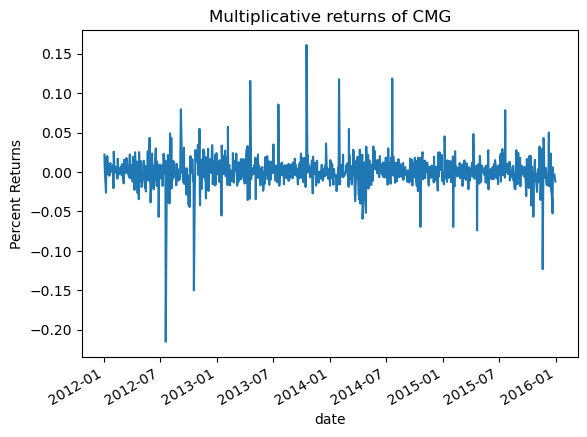

In [45]:
plt. title("Multiplicative returns of " + symbol)
plt.xlabel("Date")
plt.ylabel("Percent Returns")
mult_returns.plot ()

In [46]:
rolling_mean = prices. rolling (30) .mean ()
rolling_mean.name = "30-day rolling mean"

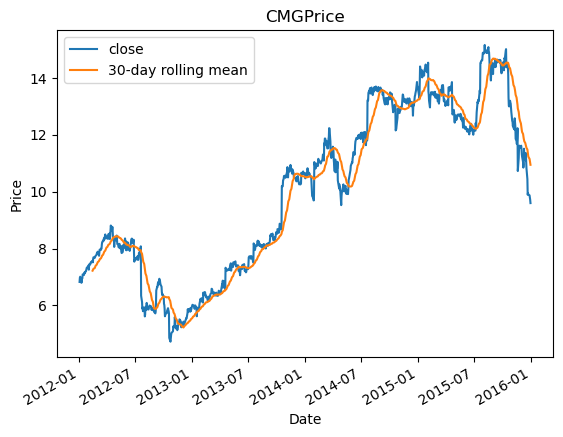

In [47]:
prices.plot ()
rolling_mean.plot ()
plt.title(symbol + "Price")
plt.xlabel("Date") 
plt.ylabel("Price")
plt.legend ()

In [48]:
rolling_std = prices.pct_change (). rolling(30) .std() * np. sqrt (252)
rolling_std.name = "30-day rolling volatility"

Text(0, 0.5, 'Standard Deviation')

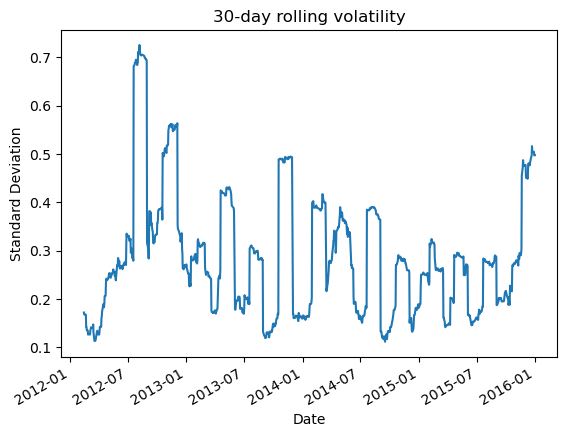

In [49]:
rolling_std.plot ()
plt. title (rolling_std. name)
plt.xlabel ("Date")
plt.ylabel("Standard Deviation")

In [50]:
print(np.median(mult_returns))

0.0002359792100385949


In [51]:
print(mult_returns.median ())

0.0002359792100385949


In [52]:
dict_data = {
"a": [1, 2, 3, 4, 5],
"D": ("L", "K", "]",
"M", "Z"),
"c": np. random. normal(0, 1, 5),
}
print(dict_data)

{'a': [1, 2, 3, 4, 5], 'D': ('L', 'K', ']', 'M', 'Z'), 'c': array([ 0.34237324, -0.05120319, -0.68050246, -1.60407307,  0.43953944])}


In [53]:
frame_data = pd.DataFrame(dict_data, index=pd.date_range ("2016-01-01", periods=5))
frame_data

,a,D,c
2016-01-01,1,L,0.342373
2016-01-02,2,K,-0.051203
2016-01-03,3,],-0.680502
2016-01-04,4,M,-1.604073
2016-01-05,5,Z,0.439539


In [54]:
s_1 = pd.Series( [2, 4, 6, 8, 10], name="Evens")
s_2 = pd.Series([1, 3, 5, 7, 9], name="Odds")
numbers = pd. concat([s_1, s_2], axis=1)
numbers

,Evens,Odds
0,2,1
1,4,3
2,6,5
3,8,7
4,10,9


In [55]:
print(numbers.columns)

Index(['Evens', 'Odds'], dtype='object')


In [56]:
numbers.columns = ["Shmevens", "Shmodds"]
print(numbers)

   Shmevens  Shmodds
0         2        1
1         4        3
2         6        5
3         8        7
4        10        9


In [57]:
numbers.index

RangeIndex(start=0, stop=5, step=1)

In [58]:
numbers. index = pd.date_range ("2016-01-01", periods=len (numbers))
print (numbers)

            Shmevens  Shmodds
2016-01-01         2        1
2016-01-02         4        3
2016-01-03         6        5
2016-01-04         8        7
2016-01-05        10        9


In [59]:
numbers.values

array([[ 2,  1],
       [ 4,  3],
       [ 6,  5],
       [ 8,  7],
       [10,  9]])

In [60]:
type (numbers.values)

numpy.ndarray

In [61]:
symbols = ["CMG", "MCD", "SHAK"]
start = "2012-01-01"
end = "2016-01-01"

In [62]:
data = obb.equity.price.historical(
  symbols, start_date=start, end_date=end, provider="yfinance"
)
data.index = pd.to_datetime(data.index)
data

,open,high,low,close,volume,dividend,symbol
date,,,,,,,
2012-01-03,6.874000,7.009800,6.800000,6.825400,36405000.0,0.0,CMG
2012-01-03,101.330002,101.589996,98.750000,98.839996,8895900.0,0.0,MCD
2012-01-04,6.920000,6.999600,6.900200,6.975000,37155000.0,0.0,CMG
2012-01-04,99.110001,100.300003,98.760002,99.389999,6754700.0,0.0,MCD
2012-01-05,6.937600,7.039600,6.851400,7.009600,33615000.0,0.0,CMG
...,...,...,...,...,...,...,...
2015-12-30,119.639999,119.989998,119.230003,119.430000,2400800.0,0.0,MCD
2015-12-30,40.540001,40.980000,39.880001,39.959999,396400.0,0.0,SHAK
2015-12-31,9.662200,9.715600,9.559400,9.597000,59830000.0,0.0,CMG


In [63]:
prices = data.pivot(columns="symbol", values="close")
prices

symbol,CMG,MCD,SHAK
date,,,
2012-01-03,6.8254,98.839996,NaN
2012-01-04,6.9750,99.389999,NaN
2012-01-05,7.0096,99.830002,NaN
2012-01-06,6.9790,100.599998,NaN
2012-01-09,6.7948,99.639999,NaN
...,...,...,...
2015-12-24,9.9020,118.570000,40.490002
2015-12-28,9.8704,118.750000,39.849998
2015-12-29,9.7988,120.070000,40.639999


In [64]:
prices.loc[:, "CMG"]

date
2012-01-03    6.8254
2012-01-04    6.9750
2012-01-05    7.0096
2012-01-06    6.9790
2012-01-09    6.7948
               ...  
2015-12-24    9.9020
2015-12-28    9.8704
2015-12-29    9.7988
2015-12-30    9.7158
2015-12-31    9.5970
Name: CMG, Length: 1006, dtype: float64

In [65]:
print (type (prices ["CMG"]))
print (type (prices. CMG))
print(type(prices. loc [:, "CMG"]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [66]:
prices.loc[:, ["CMG", "MCD"]]

symbol,CMG,MCD
date,,
2012-01-03,6.8254,98.839996
2012-01-04,6.9750,99.389999
2012-01-05,7.0096,99.830002
2012-01-06,6.9790,100.599998
2012-01-09,6.7948,99.639999
...,...,...
2015-12-24,9.9020,118.570000
2015-12-28,9.8704,118.750000
2015-12-29,9.7988,120.070000


In [67]:
prices.loc["2015-12-15":"2015-12-22", ["CMG", "MCD"]]

symbol,CMG,MCD
date,,
2015-12-15,11.0972,116.930000
2015-12-16,11.3566,117.839996
2015-12-17,11.0978,117.500000
2015-12-18,10.8216,116.660004
2015-12-21,10.4402,117.690002
2015-12-22,9.8922,117.720001


In [68]:
prices.iloc[-5:, 0:2]

symbol,CMG,MCD
date,,
2015-12-24,9.9020,118.570000
2015-12-28,9.8704,118.750000
2015-12-29,9.7988,120.070000
2015-12-30,9.7158,119.430000
2015-12-31,9.5970,118.139999


In [69]:
%timeit prices.loc[:, "CMG"]

The slowest run took 4.53 times longer than the fastest. This could mean that an intermediate result is being cached.
89.3 µs ± 50.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [70]:
%timeit prices["CMG"]

10.3 µs ± 1.02 µs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [71]:
prices.loc[prices.MCD > prices.CMG].head()

symbol,CMG,MCD,SHAK
date,,,
2012-01-03,6.8254,98.839996,NaN
2012-01-04,6.9750,99.389999,NaN
2012-01-05,7.0096,99.830002,NaN
2012-01-06,6.9790,100.599998,NaN
2012-01-09,6.7948,99.639999,NaN


In [72]:
prices.loc[(prices.MCD > prices.CMG) & ~prices.SHAK.isnull()].head()

symbol,CMG,MCD,SHAK
date,,,
2015-01-30,14.1968,92.440002,45.900002
2015-02-02,14.2510,92.510002,43.990002
2015-02-03,14.5326,93.919998,44.980000
2015-02-04,13.5200,94.050003,41.320000
2015-02-05,13.4182,94.339996,42.639999


In [73]:
s_1 = obb.equity.price.historical(
"TSLA", start_date=start, end_date=end, provider="yfinance" ).close
prices.loc[:, "TSLA"] = s_1
prices.head(5)

symbol,CMG,MCD,SHAK,TSLA
date,,,,
2012-01-03,6.8254,98.839996,NaN,1.872000
2012-01-04,6.9750,99.389999,NaN,1.847333
2012-01-05,7.0096,99.830002,NaN,1.808000
2012-01-06,6.9790,100.599998,NaN,1.794000
2012-01-09,6.7948,99.639999,NaN,1.816667


In [74]:
prices = prices.drop("TSLA", axis=1)
prices.head (5)

symbol,CMG,MCD,SHAK
date,,,
2012-01-03,6.8254,98.839996,NaN
2012-01-04,6.9750,99.389999,NaN
2012-01-05,7.0096,99.830002,NaN
2012-01-06,6.9790,100.599998,NaN
2012-01-09,6.7948,99.639999,NaN


In [75]:
filled0_prices = prices.fillna(0)
filled0_prices. head (5)

symbol,CMG,MCD,SHAK
date,,,
2012-01-03,6.8254,98.839996,0.0
2012-01-04,6.9750,99.389999,0.0
2012-01-05,7.0096,99.830002,0.0
2012-01-06,6.9790,100.599998,0.0
2012-01-09,6.7948,99.639999,0.0


In [76]:
billed_prices = prices.bfill()
billed_prices.head (5)

symbol,CMG,MCD,SHAK
date,,,
2012-01-03,6.8254,98.839996,45.900002
2012-01-04,6.9750,99.389999,45.900002
2012-01-05,7.0096,99.830002,45.900002
2012-01-06,6.9790,100.599998,45.900002
2012-01-09,6.7948,99.639999,45.900002


In [77]:
dropped_prices = prices.dropna()
dropped_prices.head(5)

symbol,CMG,MCD,SHAK
date,,,
2015-01-30,14.1968,92.440002,45.900002
2015-02-02,14.2510,92.510002,43.990002
2015-02-03,14.5326,93.919998,44.980000
2015-02-04,13.5200,94.050003,41.320000
2015-02-05,13.4182,94.339996,42.639999


Text(0.5, 0, 'Date')

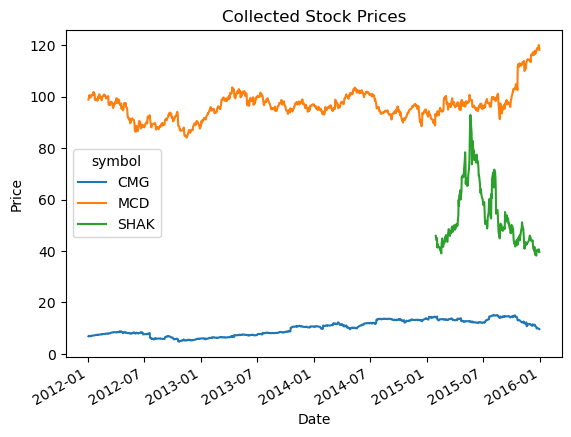

In [78]:
prices.plot()
plt.title("Collected Stock Prices")
plt.ylabel("Price")
plt.xlabel("Date")

In [79]:
prices.std()

symbol
CMG      2.933775
MCD      5.714226
SHAK    11.968587
dtype: float64

In [80]:
prices.describe()

symbol,CMG,MCD,SHAK
count,1006.000000,1006.000000,233.000000
mean,10.032733,96.621600,53.575708
std,2.933775,5.714226,11.968587
min,4.724800,84.050003,38.189999
25%,7.431100,93.672499,44.119999
50%,10.425400,96.290001,49.270000
75%,12.936700,99.137499,61.669998
max,15.155400,120.070000,92.860001


In [81]:
(2 * prices - 50).head(5)

symbol,CMG,MCD,SHAK
date,,,
2012-01-03,-36.3492,147.679993,NaN
2012-01-04,-36.0500,148.779999,NaN
2012-01-05,-35.9808,149.660004,NaN
2012-01-06,-36.0420,151.199997,NaN
2012-01-09,-36.4104,149.279999,NaN


In [82]:
mult_returns = prices.pct_change()[1:]
mult_returns.head()

symbol,CMG,MCD,SHAK
date,,,
2012-01-04,0.021918,0.005565,NaN
2012-01-05,0.004961,0.004427,NaN
2012-01-06,-0.004365,0.007713,NaN
2012-01-09,-0.026394,-0.009543,NaN
2012-01-10,0.004062,0.000602,NaN


In [83]:
mult_returns.rename(columns={"MCD": "Macdo"})

symbol,CMG,Macdo,SHAK
date,,,
2012-01-04,0.021918,0.005565,NaN
2012-01-05,0.004961,0.004427,NaN
2012-01-06,-0.004365,0.007713,NaN
2012-01-09,-0.026394,-0.009543,NaN
2012-01-10,0.004062,0.000602,NaN
...,...,...,...
2015-12-24,-0.004784,-0.001936,0.016315
2015-12-28,-0.003191,0.001518,-0.015806
2015-12-29,-0.007254,0.011116,0.019824


In [84]:
np.log(prices / prices.shift(1))

symbol,CMG,MCD,SHAK
date,,,
2012-01-03,NaN,NaN,NaN
2012-01-04,0.021681,0.005549,NaN
2012-01-05,0.004948,0.004417,NaN
2012-01-06,-0.004375,0.007683,NaN
2012-01-09,-0.026748,-0.009589,NaN
...,...,...,...
2015-12-24,-0.004796,-0.001938,0.016184
2015-12-28,-0.003196,0.001517,-0.015933
2015-12-29,-0.007280,0.011054,0.019630


<Axes: xlabel='date'>

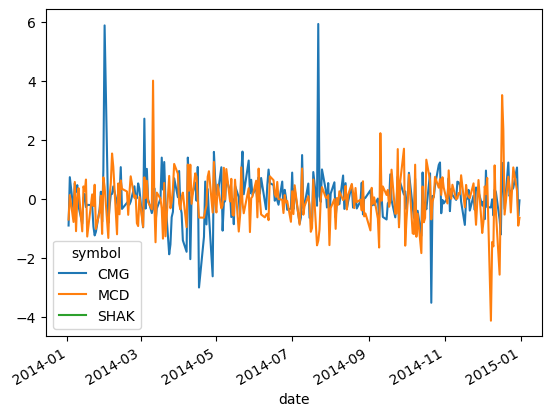

In [85]:
norm_returns = (mult_returns - mult_returns.mean(axis=0)) / mult_returns.std(axis=0)
norm_returns.loc["2014-01-01":"2015-01-01"].plot ()

In [86]:
rolling_mean = prices.rolling(30).mean()
rolling_mean.columns = prices.columns

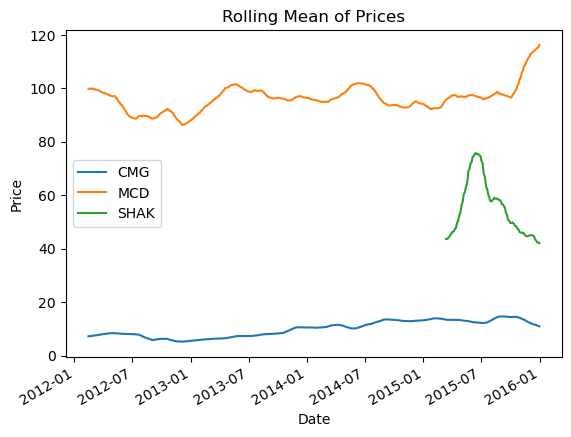

In [87]:
rolling_mean.plot ()
plt.title("Rolling Mean of Prices")
plt.xlabel("Date") 
plt.ylabel("Price")
plt.legend()

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from openbb import obb

# Charger les données
symbole = "AAPL"  # Exemple avec Apple
debut = "2020-01-01"
fin = "2023-12-22"
data = obb.equity.price.historical(
    symbole, 
    start_date=debut, 
    end_date=fin, 
    provider="yfinance"
).close

# Calculer les rendements journaliers
rendements = data['Adj Close'].pct_change().dropna()

# Définir les paramètres
fenetre = 252  # Fenêtre glissante d'un an (252 jours de trading)
taux_sans_risque = 0.02  # Taux sans risque annuel (2% dans cet exemple)

# Calculer le ratio de Sharpe glissant
rendement_exces = rendements - taux_sans_risque / 252  # Rendement excédentaire journalier
ratio_sharpe = rendement_exces.rolling(window=fenetre).mean() / rendement_exces.rolling(window=fenetre).std() * np.sqrt(252)

# Tracer le ratio de Sharpe
plt.figure(figsize=(12, 6))
plt.plot(ratio_sharpe.index, ratio_sharpe.values)
plt.title(f"Ratio de Sharpe glissant sur 1 an pour {symbole}")
plt.xlabel("Date")
plt.ylabel("Ratio de Sharpe")
plt.grid(True)
plt.show()

KeyError: 'Adj Close'